In [1]:
#Task 1 – Data Cleaning & Preprocessing

In [2]:
#Cleaned Dataset Stats

#Shape: 732 rows × 13 columns

#Key Columns: text, sentiment, timestamp, platform, likes, retweets, country

#Sentiment Classes: 100+ unique entries (not just Positive/Negative — includes emotions like Joy, Frustration, Hopeful)

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("Sentiment dataset.csv")  #load data

In [9]:
df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True) #droping unwanted cloumns


In [10]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_') #cleaned and stanadrazied cloumn name 

In [11]:
# Step 5: Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Step 6: Strip whitespace and standardize text columns
df['text'] = df['text'].str.strip().str.lower()
df['sentiment'] = df['sentiment'].str.strip().str.capitalize()
df['user'] = df['user'].str.strip()
df['platform'] = df['platform'].str.strip()
df['country'] = df['country'].str.strip()

# Step 7: Print results
print("Data cleaned successfully!")
print(f"Final shape: {df.shape}")
print("\nUnique Sentiment Labels:")
print(df['sentiment'].value_counts())

Data cleaned successfully!
Final shape: (732, 13)

Unique Sentiment Labels:
sentiment
Positive          45
Joy               44
Excitement        37
Contentment       19
Neutral           18
                  ..
Lostlove           1
Emotionalstorm     1
Suffering          1
Bittersweet        1
Intrigue           1
Name: count, Length: 191, dtype: int64


In [12]:
#Interpretation
#The dataset contains a diverse set of sentiment labels, making it ideal for a multi-class sentiment analysis project.

#The text is now uniformly lowercase and cleaned for NLP (word clouds, tokenization).

#The timestamp is now ready for time-based sentiment trends and hourly pattern visualizations.

In [13]:
#Task 3: Basic Visualizations

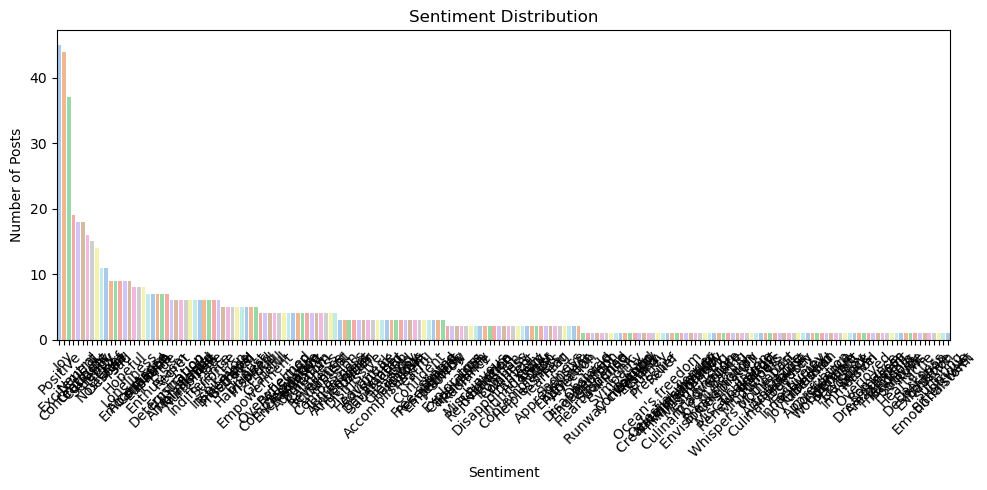

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of sentiment labels
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index, palette='pastel')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sentiment_distribution_bar.png")
plt.show()

In [15]:
#Interpretation:
#This plot shows how many social media posts fall under each sentiment (e.g., Joy, Anger, Hopeful).

#Helps quickly identify the most dominant emotions expressed by users.

#A higher count of Positive or Excitement suggests general positivity, while more Frustration or Sadness may point to dissatisfaction.

#Ideal for sentiment-driven product or brand analysis.

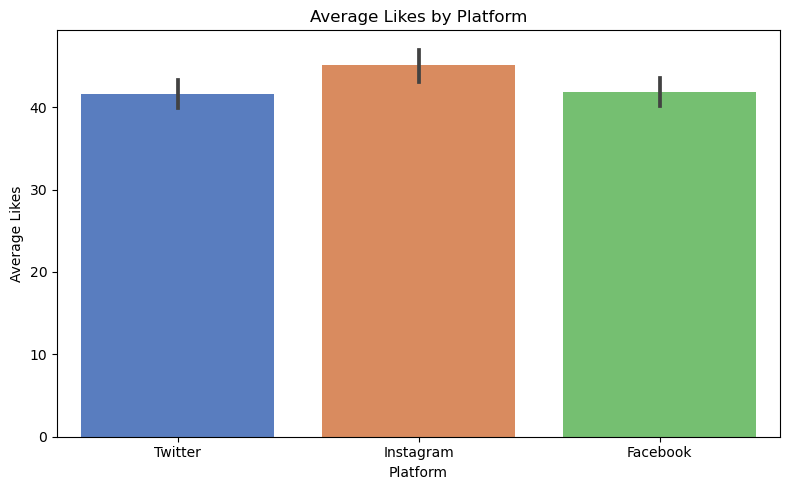

In [16]:
# Average likes per platform (numeric + categorical combo)
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='platform', y='likes', estimator='mean', palette='muted')
plt.title("Average Likes by Platform")
plt.ylabel("Average Likes")
plt.xlabel("Platform")
plt.tight_layout()
plt.savefig("avg_likes_by_platform.png")
plt.show()

In [17]:
#Interpretation:
#This chart reveals which platforms generate more average likes per post.

#Useful for understanding platform behavior:

#    High engagement on Instagram may suggest its visual appeal.

#    Lower likes on Twitter could reflect text-heavy or fast-moving content.

#Helps decide where to focus marketing or content strategy.

In [18]:
#Level 2 – Task 3: Sentiment Analysis / NLP Visualization

In [24]:
#Goals
#We’ll extract and visualize:

#Sentiment count distribution (already done in Level 1)

#Word Cloud for overall text

#Word Clouds per sentiment (e.g., Joy, Frustration)

#Optional: Top frequent words (using tokenization)



In [15]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/299.9 kB 393.8 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/299.9 kB 655.4 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/299.9 kB 853.3 kB/s eta 0:00:01
   ------------------------------------ --- 276.5/299.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
from wordcloud import WordCloud
from collections import Counter
import re

In [20]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['text'] = df['text'].str.strip().str.lower()
df['sentiment'] = df['sentiment'].str.strip().str.capitalize()


In [21]:
# Basic clean-up: remove punctuation
def clean_text(text):
    return re.sub(r'[^\w\s]', '', str(text).lower().strip())

df['clean_text'] = df['text'].apply(clean_text)

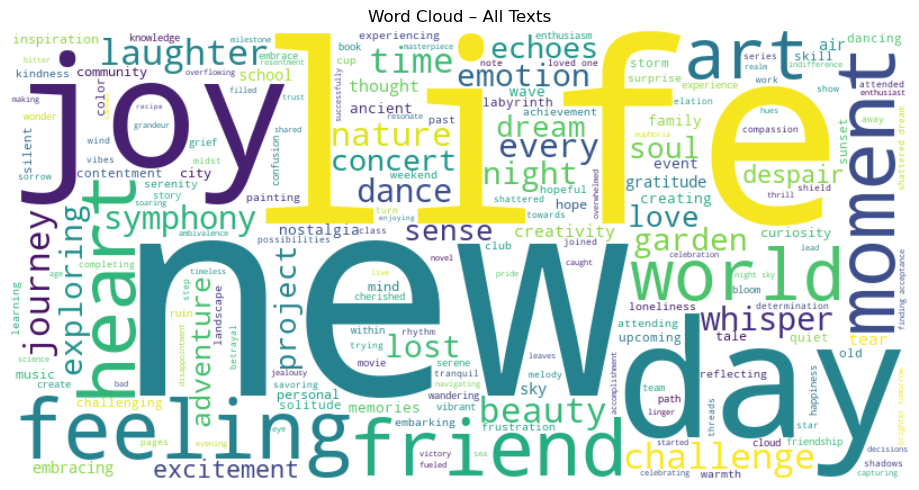

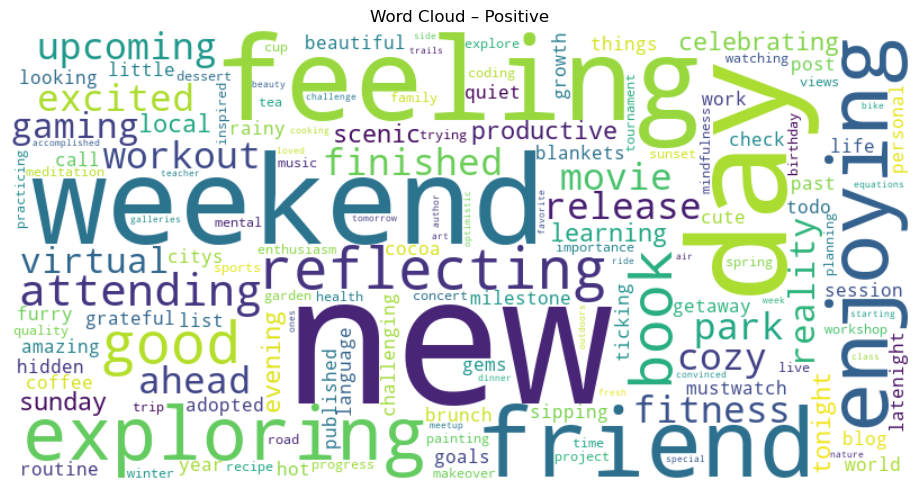

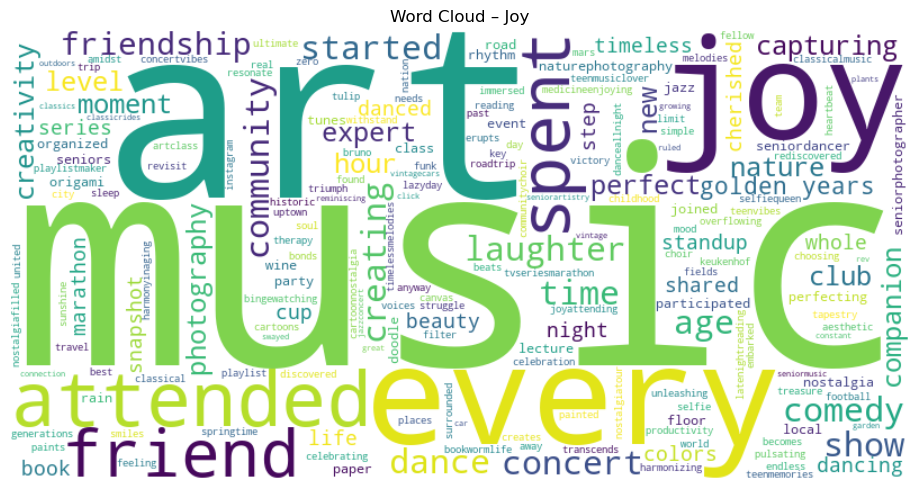

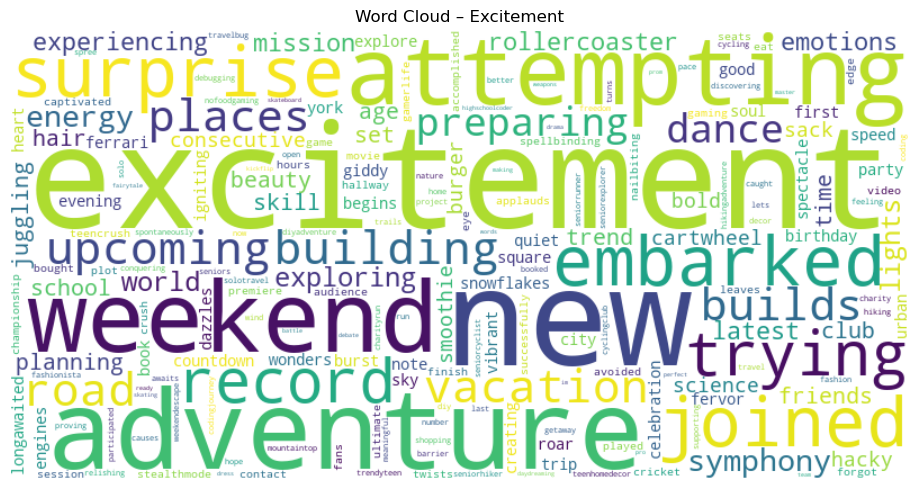

In [22]:
#Word Cloud for ALL Text
all_words = ' '.join(df['clean_text'].dropna())
wc = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud – All Texts")
plt.tight_layout()
plt.savefig("wordcloud_all_texts.png")
plt.show()

#Word Clouds by Sentiment (top 3)
top_sentiments = df['sentiment'].value_counts().nlargest(3).index

for sentiment in top_sentiments:
    text_subset = df[df['sentiment'] == sentiment]['clean_text']
    words = ' '.join(text_subset.dropna())
    wc = WordCloud(width=800, height=400, background_color='white').generate(words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud – {sentiment}")
    plt.tight_layout()
    plt.savefig(f"wordcloud_{sentiment.lower()}.png")
    plt.show()

In [23]:
#Interpretation (for Report)
#Word clouds reveal the most common words users associate with each emotion.

#For example, "happy", "great", "amazing" may dominate Joy, while "angry", "bad", "hate" may appear in Frustration.

#Helps understand how people express emotions using language.